In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math

In [5]:
#load csv data for each demographic variable
pull_GDP = "../Clean Data/GDPClean.csv"
pull_MedAge = "../Clean Data/MedianAgeClean.csv"
pull_PPP = "../Clean Data/PPPClean.csv"
pull_PopDen = "../Clean Data/PopulationDensityClean.csv"
pull_PopTot = "../Clean Data/PopulationTotalClean.csv"
pull_happy = "../Data/World Happiness 2016.csv"
pull_coord = "../Clean Data/CoordinatesClean.csv"

GDPClean = pd.read_csv(pull_GDP)
MedAgeClean = pd.read_csv(pull_MedAge, encoding= "utf-8")
PPPClean = pd.read_csv(pull_PPP)
PopDenClean = pd.read_csv(pull_PopDen)
PopTotClean = pd.read_csv(pull_PopTot)
Coord = pd.read_csv(pull_coord)
happy = pd.read_csv(pull_happy)


## Merge Happiness score with GDP

In [6]:
#Start with an out merge to identify which countries are present but named differently
Happy_GDP = pd.merge(happy, GDPClean, how = "outer")

#export file to check in excel
output_data_file = "Happy_GPD.csv"
Happy_GDP.to_csv(output_data_file, index=False)

Happy_GDP.count()

Country              283
Happiness Rank       157
Happiness Score      157
GDP (current US$)    250
dtype: int64

In [7]:
#looking at the exported csv countries that are named differently were identified and will be replaced
C_rename = {"Yemen, Rep.":"Yemen","Slovak Republic":"Slovakia","Russian Federation":"Russia","North Macedonia":"Macedonia",
"Lao PDR":"Laos","Kyrgyz Republic":"Kyrgyzstan","Korea, Rep.":"South Korea","Iran, Islamic Rep.":"Iran",
"Hong Kong SAR, China":"Hong Kong","Egypt, Arab Rep.":"Egypt","Cote d'Ivoire":"Ivory Coast",
"Congo, Dem. Rep.":"Congo (Kinshasa)","Congo, Rep.":"Congo (Brazzaville)","West Bank and Gaza":"Palestinian Territories"}
#Countries not present in GDP: "North Cyprus", "Somaliland Region","Syria","Venezuela","Taiwan"

GDPClean2 = GDPClean.replace(C_rename)
Happy_GDP = pd.merge(happy, GDPClean2, how = "left")

#export file to check in excel
output_data_file = "Happy_GPD2.csv"
Happy_GDP.to_csv(output_data_file, index=False)
Happy_GDP.count()


Country              157
Happiness Rank       157
Happiness Score      157
GDP (current US$)    152
dtype: int64

## Merge to add PPP

In [8]:
#Start with an out merge to identify which countries are present but named differently
PPPClean2 = PPPClean.replace(C_rename)
Happy_PPP =  pd.merge(Happy_GDP, PPPClean2, how = "outer")

#Countries missing from PPP data: "North Cyprus", "Somaliland Region","Syria","Venezuela","Taiwan","Somolia"
output_data_file = "Happy_PPP.csv"
Happy_PPP.to_csv(output_data_file, index=False)
Happy_PPP =  pd.merge(Happy_GDP, PPPClean2, how = "left")

Happy_PPP.count()

Country              157
Happiness Rank       157
Happiness Score      157
GDP (current US$)    152
PPP                  151
dtype: int64

## Merge to add Population Total

In [11]:
#countries missing from Population Total data:  "North Cyprus", "Somaliland Region","Syria","Venezuela","Taiwan"
PopTotClean2 = PopTotClean.replace(C_rename)
Happy_PopTot =  pd.merge(Happy_PPP, PopTotClean2, how = "left")

output_data_file = "Happy_PopTot.csv"
Happy_PopTot.to_csv(output_data_file, index=False)

Happy_PopTot.count()

Country              157
Happiness Rank       157
Happiness Score      157
GDP (current US$)    152
PPP                  151
Population Total     152
dtype: int64

## Merge to add Population Density

In [13]:
#Missing from Population Density data:  "North Cyprus", "Somaliland Region","Syria","Venezuela","Taiwan","Sudan","South Sudan"
PopDenClean2 = PopDenClean.replace(C_rename)
Happy_PopDen =  pd.merge(Happy_PopTot, PopDenClean2, how = "left")

output_data_file = "Happy_PopDen.csv"
Happy_PopDen.to_csv(output_data_file, index=False)

Happy_PopDen.count()

Country               157
Happiness Rank        157
Happiness Score       157
GDP (current US$)     152
PPP                   151
Population Total      152
Population Density    150
dtype: int64

## Merge to add Median Age

In [14]:
#Start with an out merge to identify which countries are present but named differently
Happy_MedAge =  pd.merge(Happy_PopDen, MedAgeClean, how = "outer")
output_data_file = "Happy_MedAge.csv"
Happy_MedAge.to_csv(output_data_file, index=False)
Happy_MedAge.count()
#look at exported csv to identify countries to replace

Country               235
Happiness Rank        157
Happiness Score       157
GDP (current US$)     152
PPP                   151
Population Total      152
Population Density    150
Median Age            227
dtype: int64

In [15]:
C_rename2 = {"Congo (Republic)":"Congo (Brazzaville)","Congo (Democratic Republic)":"Congo (Kinshasa)","Myanmar (Burma)":"Myanmar",
"Korea (South)":"South Korea","United Kingdom of Great Britain and Northern Ireland":"United Kingdom",
"United States of America":"United States"}
MedAgeClean2 = MedAgeClean.replace(C_rename2)

#countries missing from Median Age data:"North Cyprus","Somaliland Region"
Happy_MedAge =  pd.merge(Happy_PopDen, MedAgeClean2, how = "left")
output_data_file = "Happy_MedAge2.csv"
Happy_MedAge.to_csv(output_data_file, index=False)
Happy_MedAge.count()

Country               157
Happiness Rank        157
Happiness Score       157
GDP (current US$)     152
PPP                   151
Population Total      152
Population Density    150
Median Age            155
dtype: int64

C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


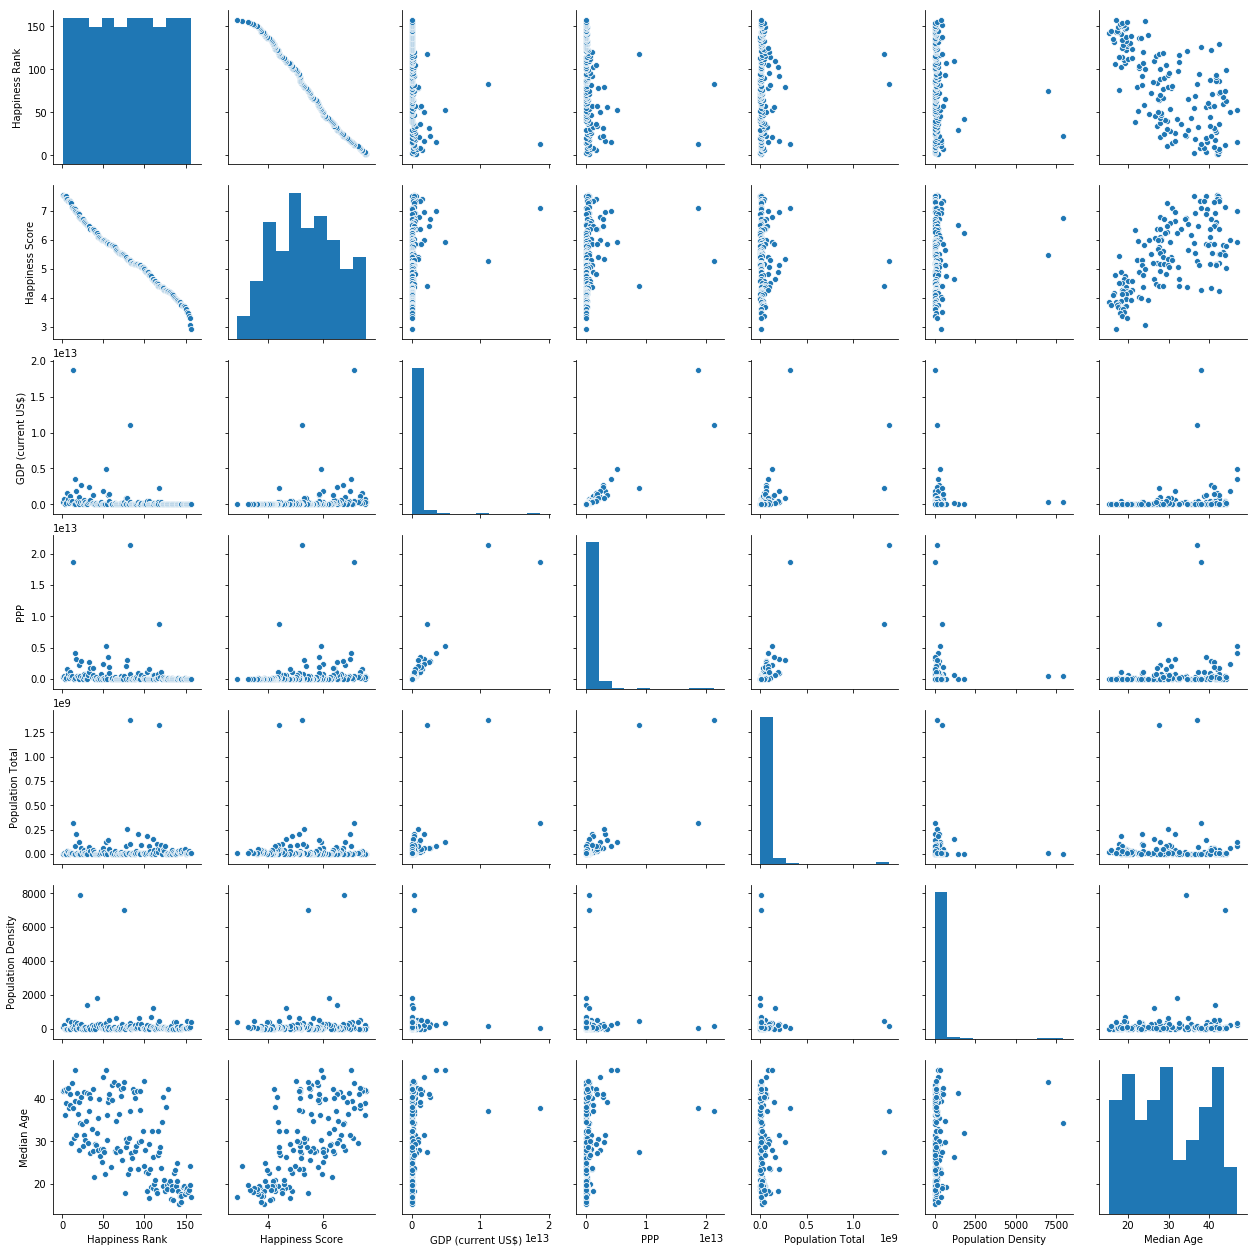

In [16]:
#initial look at relationships between variables
sns.pairplot(Happy_MedAge)


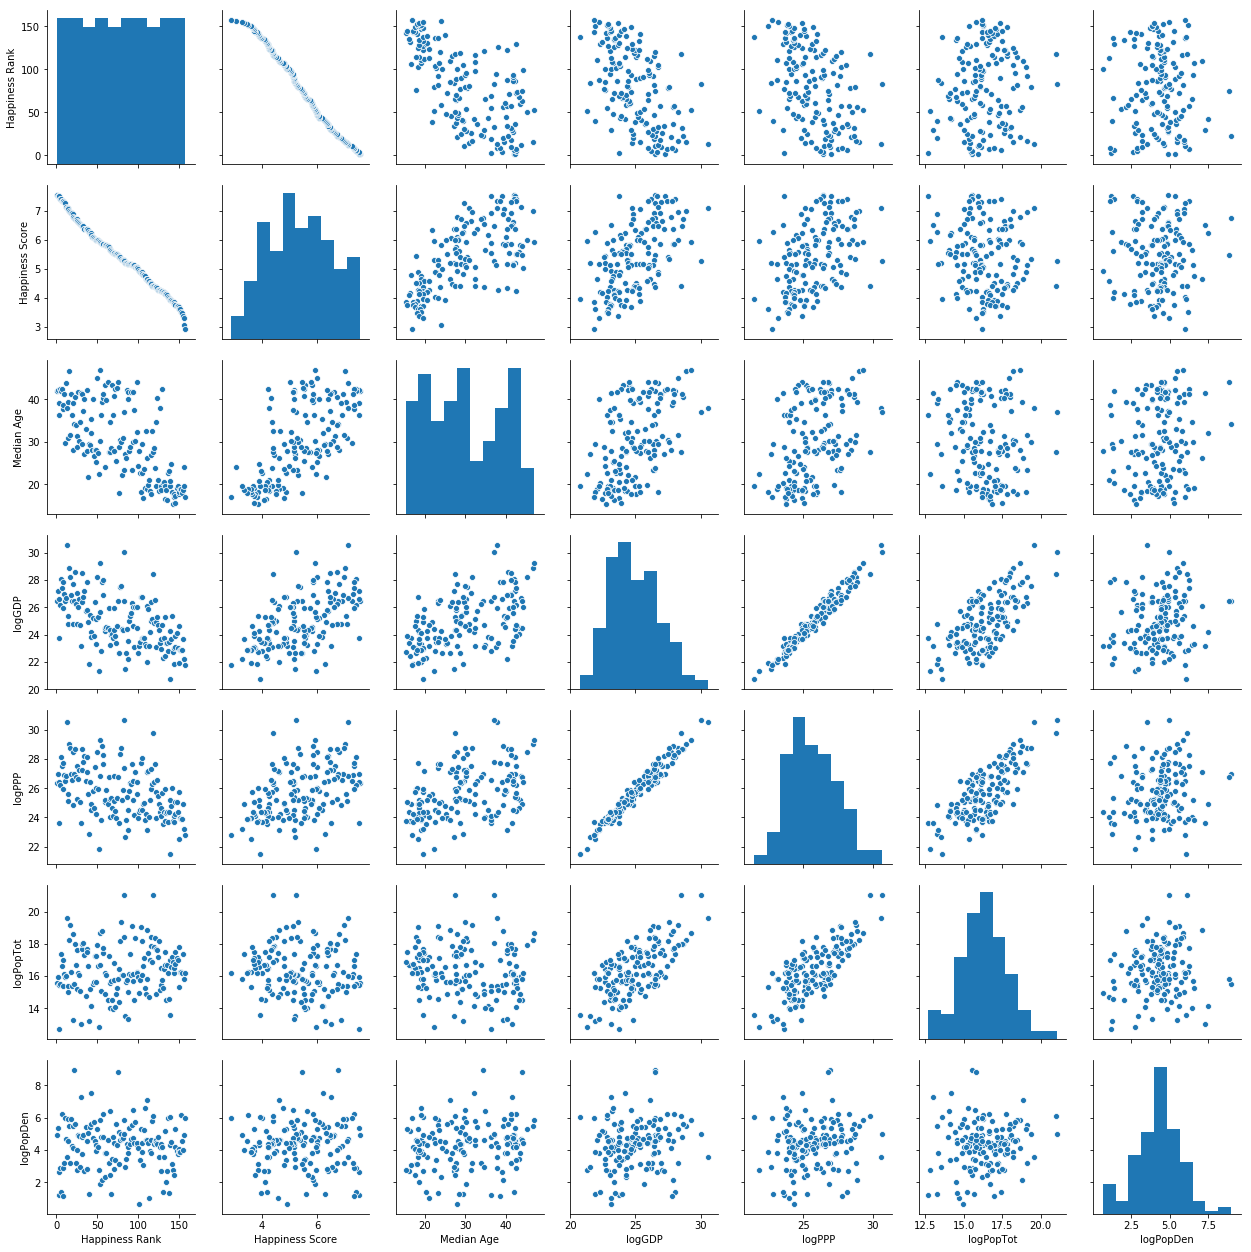

In [25]:
#apply a ln transformation to GDP and PPP to see a linear relationship with Happiness Score
trans_data = Happy_MedAge
trans_data["logGDP"] = [math.log(x) for x in trans_data["GDP (current US$)"]]
trans_data["logPPP"] = [math.log(x) for x in trans_data["PPP"]]
trans_data["logPopTot"] = [math.log(x) for x in trans_data["Population Total"]]
trans_data["logPopDen"] = [math.log(x) for x in trans_data["Population Density"]]
trans_data = trans_data[["Country","Happiness Rank","Happiness Score","Median Age","logGDP","logPPP","logPopTot","logPopDen"]]
sns.pairplot(trans_data)

Fit for log(GDP): Score = 0.3288 * Distance + -2.8132
Fit for Log(PPP): Score = 0.2876 * Distance + -2.0127
Fit for log(Population Total): Score = -0.081 * Distance + 6.7092
Fit for log(Population Density): Score = -0.0002 * Distance + 5.4051
Fit for Median Age: Score = 0.0851 * Distance + 2.8264


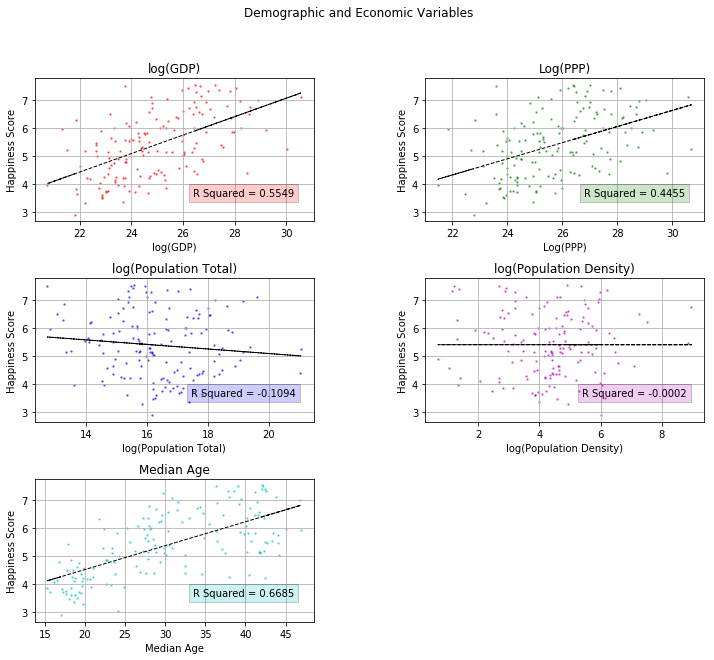

In [42]:
variables = ["logGDP","logPPP","logPopTot","logPopDen","Median Age"]
names = ["log(GDP)","Log(PPP)","log(Population Total)","log(Population Density)","Median Age"]

x = [0.75,0.75, 0.75,0.75, 0.75]
y = [0.2, 0.2, 0.2, 0.2, 0.2]
colors = ["r","g","b","m","c","k"]
fig = plt.figure(figsize = (12,10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("Demographic and Economic Variables")
for i, var in enumerate(variables):
    var_data = trans_data[["Happiness Score",var]].dropna()
    var_slope, var_int, var_r, var_p, var_std_err = stats.linregress(
    var_data[var], var_data["Happiness Score"])
    var_fit = var_slope * var_data[var] + var_int
    ax = fig.add_subplot(3, 2, (i+1))
    ax.scatter(var_data[var],var_data["Happiness Score"], s = 2, alpha = .5, color = colors[i])
    ax.plot(var_data[var],var_fit, "k--", linewidth=1)
    ax.set_xlabel(names[i])
    ax.set_ylabel("Happiness Score")
    ax.grid()
    rsqu = f"R Squared = {round(var_r,4)}"
    ax.text(x[i], y[i], rsqu, horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor=colors[i], alpha=0.2))
    ax.set_title(names[i])
    print(f"Fit for {names[i]}: Score = {round(var_slope,4)} * Distance + {round(var_int,4)}")